In [1]:
#  problem statment
#  build a preditive model
#  to target the high probable customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cr =  pd.read_csv("CreditRisk.csv")
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [3]:
#cr.head(50)

In [4]:
#cr.isnull().sum()

In [4]:
cr.Gender.fillna("Male" , inplace = True)
cr.Married.fillna("No" , inplace = True)
cr.Dependents.fillna(0, inplace = True)
cr.Self_Employed.fillna("No" , inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean() , inplace = True)
cr.Credit_History.fillna( 1 , inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean()  , inplace = True)

In [5]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# convert categoriacl / non numeric to numeric 

In [6]:
cr.Gender.replace({"Male" :0 , "Female" :1}, inplace = True )
cr.Self_Employed.replace({"Yes" :1 , "No" :0}, inplace = True)
cr.Education.replace({"Graduate" :1 , "Not Graduate" :0}, inplace = True)
cr.Married.replace({"Yes":1 , "No" :0}, inplace = True )
cr.Property_Area.replace({"Semiurban" :1 , "Urban" :2  , "Rural" :0}, inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" :0}, inplace = True)

In [7]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,0,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [8]:
cr.shape

(981, 13)

In [9]:
cr_x = cr.iloc[ : , 1:12]
cr_y = cr.iloc[ : , 12]

In [10]:
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0
2,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,0,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
cr_x_train , cr_x_test , cr_y_train , cr_y_test = train_test_split(cr_x  , cr_y , test_size = .2)

In [13]:
print(cr_x_train.shape)
print(cr_y_train.shape)
print("------------------------")
print(cr_x_test.shape)
print(cr_y_test.shape)

(784, 11)
(784,)
------------------------
(197, 11)
(197,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression(class_weight= 'balanced')

In [16]:
log_reg.fit(cr_x_train, cr_y_train);

C:\Users\Sayali Ingle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
pred_test = log_reg.predict(cr_x_test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
tab1 = confusion_matrix(pred_test , cr_y_test)
tab1

array([[ 28,  10],
       [ 26, 133]], dtype=int64)

In [20]:
tab1.diagonal().sum() / tab1.sum() * 100

81.7258883248731

In [21]:
log_reg.predict_proba(cr_x_test)


array([[0.37111087, 0.62888913],
       [0.23001445, 0.76998555],
       [0.32608629, 0.67391371],
       [0.34398585, 0.65601415],
       [0.30190857, 0.69809143],
       [0.22859204, 0.77140796],
       [0.37341419, 0.62658581],
       [0.46297001, 0.53702999],
       [0.2860534 , 0.7139466 ],
       [0.30845359, 0.69154641],
       [0.25034557, 0.74965443],
       [0.66420701, 0.33579299],
       [0.40552818, 0.59447182],
       [0.26575166, 0.73424834],
       [0.9077217 , 0.0922783 ],
       [0.38234393, 0.61765607],
       [0.24259545, 0.75740455],
       [0.39776338, 0.60223662],
       [0.24035865, 0.75964135],
       [0.42317479, 0.57682521],
       [0.92910244, 0.07089756],
       [0.05026369, 0.94973631],
       [0.33242971, 0.66757029],
       [0.24618113, 0.75381887],
       [0.23119605, 0.76880395],
       [0.35847399, 0.64152601],
       [0.05204348, 0.94795652],
       [0.89221243, 0.10778757],
       [0.42672618, 0.57327382],
       [0.35927635, 0.64072365],
       [0.

In [22]:
log_reg.predict(cr_x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [23]:
len(log_reg.predict_proba(cr_x_test))

197

In [24]:
list(log_reg.coef_)

[array([ 2.69539154e-02,  5.35996827e-01, -9.22691563e-02,  3.65346969e-01,
         1.15251415e-01, -1.00721723e-06, -3.19338333e-05, -2.22738854e-03,
        -8.72226311e-03,  3.08779936e+00,  4.64516150e-01])]

In [25]:
log_reg.intercept_

array([0.04157439])

In [26]:
pred_prob_full =log_reg.predict_proba(cr_x)
pred_prob_full = pd.DataFrame(pred_prob_full)

In [27]:
customer_data = pd.DataFrame({"Loan_Id" :cr.Loan_ID , "Prob" : pred_prob_full.iloc[ : , 1]})
customer_data.head()

,Loan_Id,Prob
0,LP001002,0.723206
1,LP001003,0.613146
2,LP001005,0.856308
3,LP001006,0.751980
4,LP001008,0.723849


In [28]:
customer_data = customer_data.sort_values("Prob", ascending= False)
customer_data.head()

,Loan_Id,Prob
497,LP002588,0.989142
686,LP001375,0.981544
575,LP002868,0.977775
14,LP001030,0.974783
68,LP001238,0.971575


In [29]:
#  lets build the AUROC CURVE

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
pred_test = log_reg.predict(cr_x_test)
#pred_test

In [32]:
roc_auc_score(pred_test , cr_y_test)    # Area under the curve value

0.7866600463422708

In [33]:
pred_test_prob = log_reg.predict_proba(cr_x_test)

In [34]:
fpr , tpr , thre = roc_curve(cr_y_test ,  pred_test_prob[:, 1])

Text(0.3, 0.5, 'Area under curve is .84')

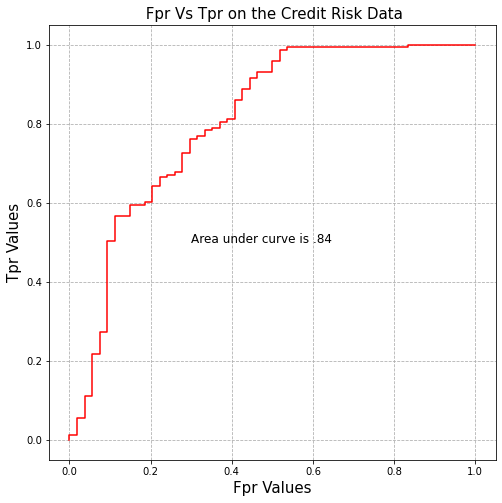

In [35]:
plt.figure(figsize= (8 , 8))
plt.plot(fpr, tpr, color = "r")
plt.grid(linestyle =  '--')
plt.xlabel("Fpr Values", size = 15 )
plt.ylabel("Tpr Values", size = 15 )
plt.title(" Fpr Vs Tpr on the Credit Risk Data",size = 15 )
plt.text(x = .3 , y = .5 , s= "Area under curve is .84" , size = 12)

In [38]:
#from sklearn.linear_model import LogisticRegressionCV
#reg_model = LogisticRegressionCV()

In [39]:
#reg_model.fit(cr_x_train, cr_y_train)

In [40]:
#reg_model.fit(cr_x_train, cr_y_train)